## Oficina 2: Sistema de classificação de imagens

Você foi contratado para criar um sistema que realiza a classificação de imagens de frutas para uma empresa de e-commerce. O objetivo é que, ao enviar uma imagem, o sistema identifique se a fruta é uma maçã, uma banana ou uma laranja. Sabendo que você possui um banco de imagens já categorizado, explique quais tipos de redes neurais você utilizaria para resolver esse problema, como seria o processo de implementação utilizando Python e quais etapas principais precisam ser seguidas para treinar o modelo.
Padrão de Resposta para a Atividade:

- Indicação clara do tipo de rede neural usada e justificativa do porquê de ser a escolha mais adequada;
- Descrição do processo de pré-processamento das imagens;
- Apresentação do modelo de rede neural em Python, com uma breve explicação de cada camada;
- Compilação e treinamento do modelo, mencionando a função de perda e o otimizador usados;
- Processo de avaliação e validação do modelo;
- Conclusão explicando como o modelo resolverá o problema proposto.

In [ ]:
%pip install kagglehub
import pandas as pd
import os 
import numpy as np
import matplotlib.pyplot as plt
import zipfile as zf
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import kagglehub 



path = kagglehub.dataset_download("moltean/fruits")

train_path = os.path.join(path, "fruits-360_dataset_100x100/fruits-360/Training")
test_path = os.path.join(path, "fruits-360_dataset_100x100/fruits-360/Test")





Note: you may need to restart the kernel to use updated packages.
Path to dataset files: /home/codespace/.cache/kagglehub/datasets/moltean/fruits/versions/11
Training paths: ['/home/codespace/.cache/kagglehub/datasets/moltean/fruits/versions/11/fruits-360_dataset_100x100/fruits-360/Training/Pineapple Mini 1', '/home/codespace/.cache/kagglehub/datasets/moltean/fruits/versions/11/fruits-360_dataset_100x100/fruits-360/Training/Pepper Orange 1', '/home/codespace/.cache/kagglehub/datasets/moltean/fruits/versions/11/fruits-360_dataset_100x100/fruits-360/Training/Pineapple 1']
Test paths: ['/home/codespace/.cache/kagglehub/datasets/moltean/fruits/versions/11/fruits-360_dataset_100x100/fruits-360/Test/Pineapple Mini 1', '/home/codespace/.cache/kagglehub/datasets/moltean/fruits/versions/11/fruits-360_dataset_100x100/fruits-360/Test/Pepper Orange 1', '/home/codespace/.cache/kagglehub/datasets/moltean/fruits/versions/11/fruits-360_dataset_100x100/fruits-360/Test/Pineapple 1']


In [72]:
img_widht = 100
img_height = 100



In [126]:

data_train = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    labels="inferred",
    label_mode="int",
    image_size=(img_widht, img_height),
    color_mode="rgb",
    batch_size=32,
)

data_train = tf.keras.preprocessing.image_dataset_from_directory(
    test_path,
    labels="inferred",
    label_mode="int",
    image_size=(img_widht, img_height),
    color_mode="rgb",
    batch_size=32,
)



Found 61003 files belonging to 122 classes.
Found 20450 files belonging to 122 classes.


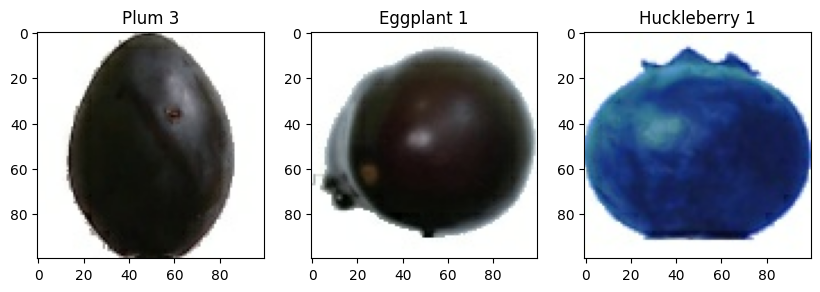

In [69]:
datacat = data_train.class_names
plt.figure(figsize=(10, 10))

for images, labels in data_train.take(1):
    for i in range(3):
       plt.subplot(3, 3, i + 1)
       plt.imshow(images[i].numpy().astype("uint8"))
       plt.title(data_train.class_names[labels[i]])
